In [15]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [31]:
animal_id = 'Tom'
exp_date = '2024-09-13'
session = 1

In [32]:
# file_name = '/Volumes/xieluanlabs/xl_cl/setup_test/whole_test_2/Imaging_source_test_2024-09-04_1_PROC'
file_name = rf"D:\cl\video\Imaging_source_{animal_id}_{exp_date}_{session}_PROC"
with open(file_name, 'rb') as f:
    data = pickle.load(f)

data.keys()

dict_keys(['start_time', 'frame_time', 'time_stamp', 'step', 'signal', 'photodiode_read', 'photodiode_time', 'x_pos', 'y_pos', 'heading_direction', 'head_angle', 'before_send', 'after_send'])

In [33]:
# task_file = '/Volumes/xieluanlabs/xl_cl/setup_test/whole_test_2/test_2024-09-04_1.pickle'
task_file = rf"D:\cl\task\{animal_id}_{exp_date}_{session}.pickle"
with open(task_file, 'rb') as f:
    task = pickle.load(f)
task.keys()

dict_keys(['start_time', 'episode', 'step', 'step_time', 'state', 'action', 'reward', 'terminal', 'session_label', 'dlc_read_time', 'dlc_x', 'dlc_y', 'dlc_heading', 'dlc_time_stamp', 'block_labels', 'slit_size', 'trial_slit_depth', 'r_report_box', 'l_report_box', 'start_box', 'cropped_image', 'unity_arena_size', 'camera_rotation', 'mouse_report_delay', 'velocity_threshold', 'start_box_delay', 'distractor', 'target_size', 'grey_screen_active', 'camera_type', 'target_selection', 'distractor_selection', 'occlusion_type', 'target_distance', 'target_rotation', 'reward_size', 'prob_obj_on_left', 'slit_size_param', 'block_length_param', 'rotate_camera_param', 'epoch_param', 'mouse_report_delay_param', 'prob_block_coherence', 'slit_depth_param', 'target_selection_param', 'distractor_selection_param', 'occlusion_type_param', 'target_spread_param', 'target_rotation_param', 'target_height_param', 'target_distance_param', 'trial_prob_object_left', 'trial_target_spread', 'trial_target_height'])

In [34]:
# TS_file = '/Volumes/xieluanlabs/xl_cl/setup_test/whole_test/Imaging_source_test_2024-08-29_1_TS.npy'
TS_file = rf"D:\cl\video\Imaging_source_{animal_id}_{exp_date}_{session}_TS.npy"
TS = np.load(TS_file)

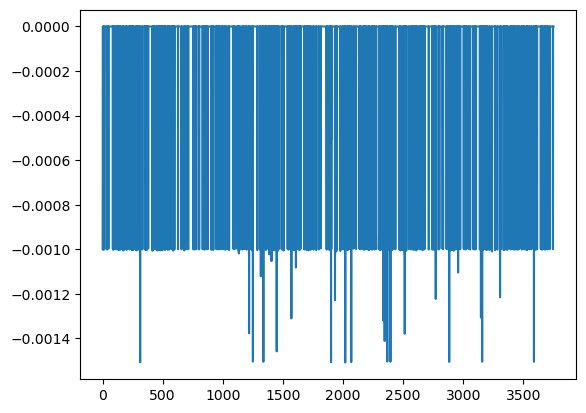

In [37]:
plt.plot(data ["before_send"] - data ["after_send"])

## first step time delay

Text(0.5, 1.0, 'DLC keypoint time stamp - frame time stamp')

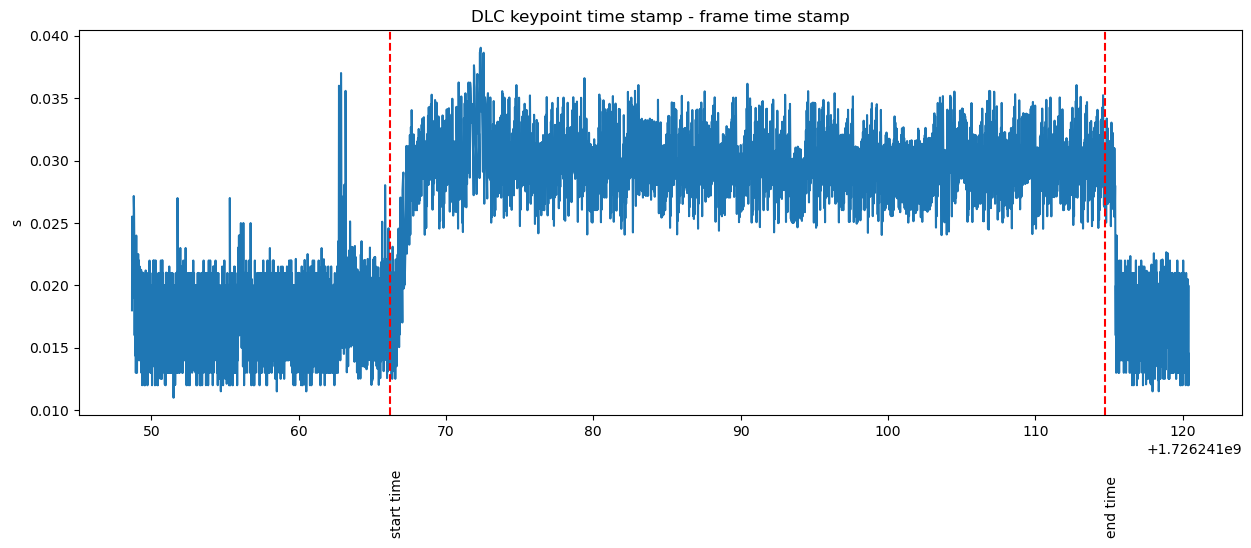

In [36]:
frame_dlc_diff = data['time_stamp'] - data['frame_time']
frame_dlc_diff = frame_dlc_diff[1:]
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(data['frame_time'][1:],frame_dlc_diff)

# mark the task start time and end time
start_time = task['start_time']
end_time = task['start_time'] + task['step_time'][-1]

plt.axvline(x=start_time, color='r', linestyle='--')
plt.axvline(x=end_time, color='r', linestyle='--')
# add labels next to the lines
plt.text(start_time, 0, 'start time', rotation=90)
plt.text(end_time, 0, 'end time', rotation=90)

plt.ylabel('s')
plt.title('DLC keypoint time stamp - frame time stamp')

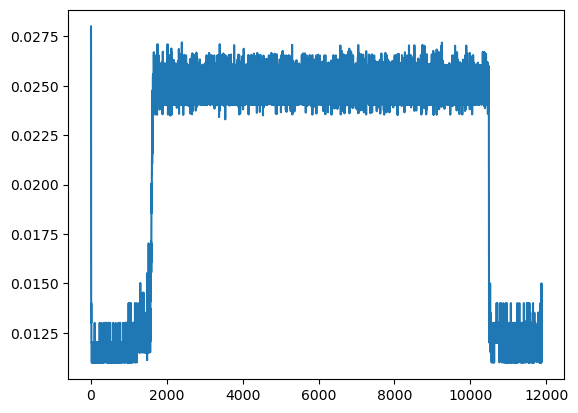

In [23]:
plt.plot(np.diff(data['time_stamp']))

## generated signal and read signal


In [6]:
generated_square = data['signal']
generated_t = data['time_stamp']
read_square = data['photodiode_read']
# scaling read_square to 0-1
read_square = (read_square - np.min(read_square)) / (np.max(read_square) - np.min(read_square))
read_t = data['photodiode_time']

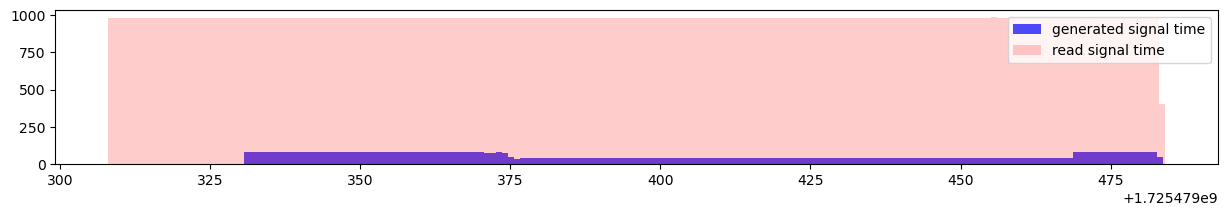

In [21]:
# plot generated_t histgram
w=1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 2))

ax.hist(generated_t, bins=np.arange(min(generated_t), max(generated_t) + w, w), color='b', alpha=0.7, label='generated signal time')
ax.hist(read_t, bins=np.arange(min(read_t), max(read_t)+w, w), color='r', alpha=0.2, label='read signal time')
plt.legend()

generated signal time stamps depend on the proc file time stamp, the time stamp dlclivegui is sending information to vr4mice \
read signal timte stamps depend on teensy baudrate, which is 9600 here.

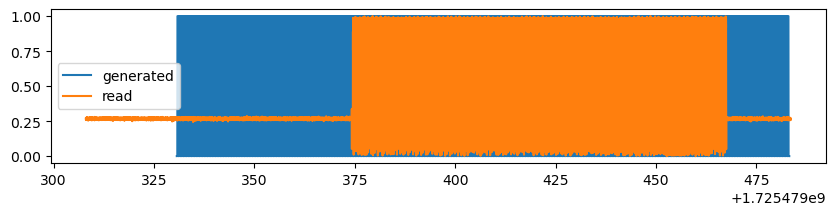

In [22]:
ax, fig = plt.subplots(figsize=(10, 2))
plt.plot(generated_t, generated_square, label='generated')
plt.plot(read_t, read_square, label='read')
plt.legend()

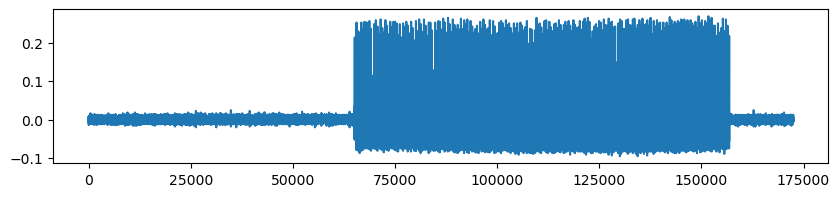

In [23]:
# calculate the difference of the read_square
diff_read = np.diff(read_square)
ax, fig = plt.subplots(figsize=(10, 2))
plt.plot(diff_read)

(1725479360.9179347, 1725479361.4069493)

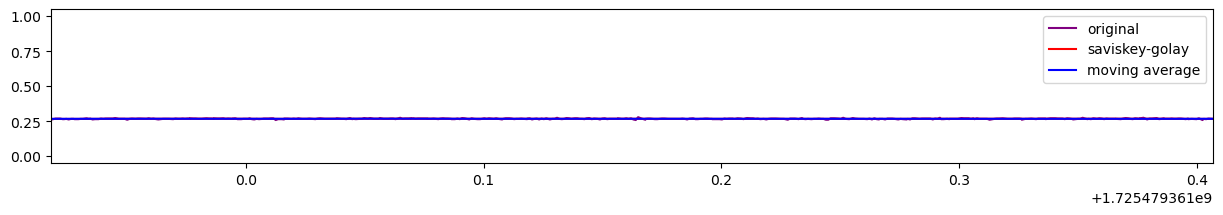

In [24]:
from scipy.signal import savgol_filter
window_size = 51
SG_smoothed_read_square = savgol_filter(read_square, window_length=window_size, polyorder=3)
moving_average_read_square = np.convolve(read_square, np.ones(window_size)/window_size, mode='same')

ax, fig = plt.subplots(figsize=(15, 2))
plt.plot(read_t, read_square, 'purple', label='original')
plt.plot(read_t, SG_smoothed_read_square, 'r', label='saviskey-golay')
plt.plot(read_t, moving_average_read_square, 'b', label='moving average')
plt.legend()
plt.xlim(read_t[52000], read_t[52000 + int(9600*.05)])

(1725479360.9694316, 1725479361.2133758)

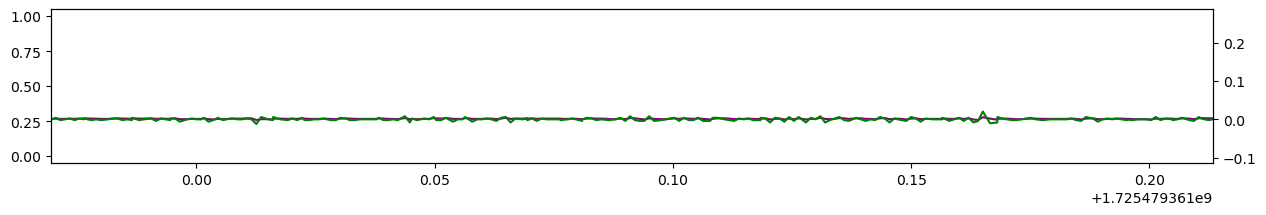

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 2), sharex=True)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the first dataset on the primary y-axis
ax2.plot(read_t[1:], diff_read, 'g-', label='diff')

# Plot the second dataset on the secondary y-axis
ax1.plot(read_t, read_square, 'purple', label='recorded photodiode signal')

plt.xlim(read_t[52050], read_t[52050 + int(9600*.05/2)])

utilize the last sharp rising edge of the read signal to find the first small rising edge. \

In [26]:
diff_read = np.diff(read_square)

rising_mark = np.where(diff_read > 0.1)[0] # the sharp rising edge index
rising_read_t = np.zeros(len(rising_mark))

baud_rate = 9600
T = 0.05 # 0.05s
# extract the data 0.05s before the rising_mark, baud_rate = 9600, and get the first time stamp that the diff is larger than 0.06
for i, mark in enumerate(rising_mark):
    extracted_diff = diff_read[mark - int(baud_rate * T/2):mark]
    extracted_read_t = read_t[mark - int(baud_rate * T/2):mark]

    first_rising_index = np.where(extracted_diff > 0.02)[0][0]
    first_rising_t = extracted_read_t[first_rising_index]
    rising_read_t[i] = first_rising_t

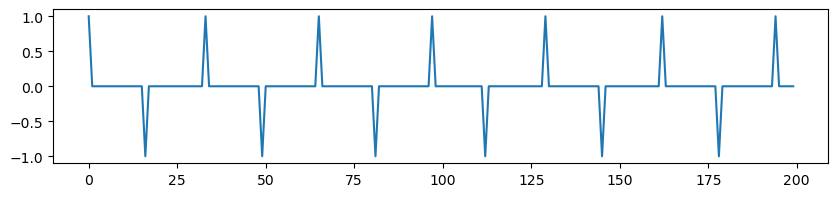

In [27]:
diff_generated = np.diff(generated_square)
generate_rising = np.where(diff_generated == 1)[0]
generate_rising_t = generated_t[generate_rising]

ax, fig = plt.subplots(figsize=(10, 2))
plt.plot(diff_generated[1000:1200])

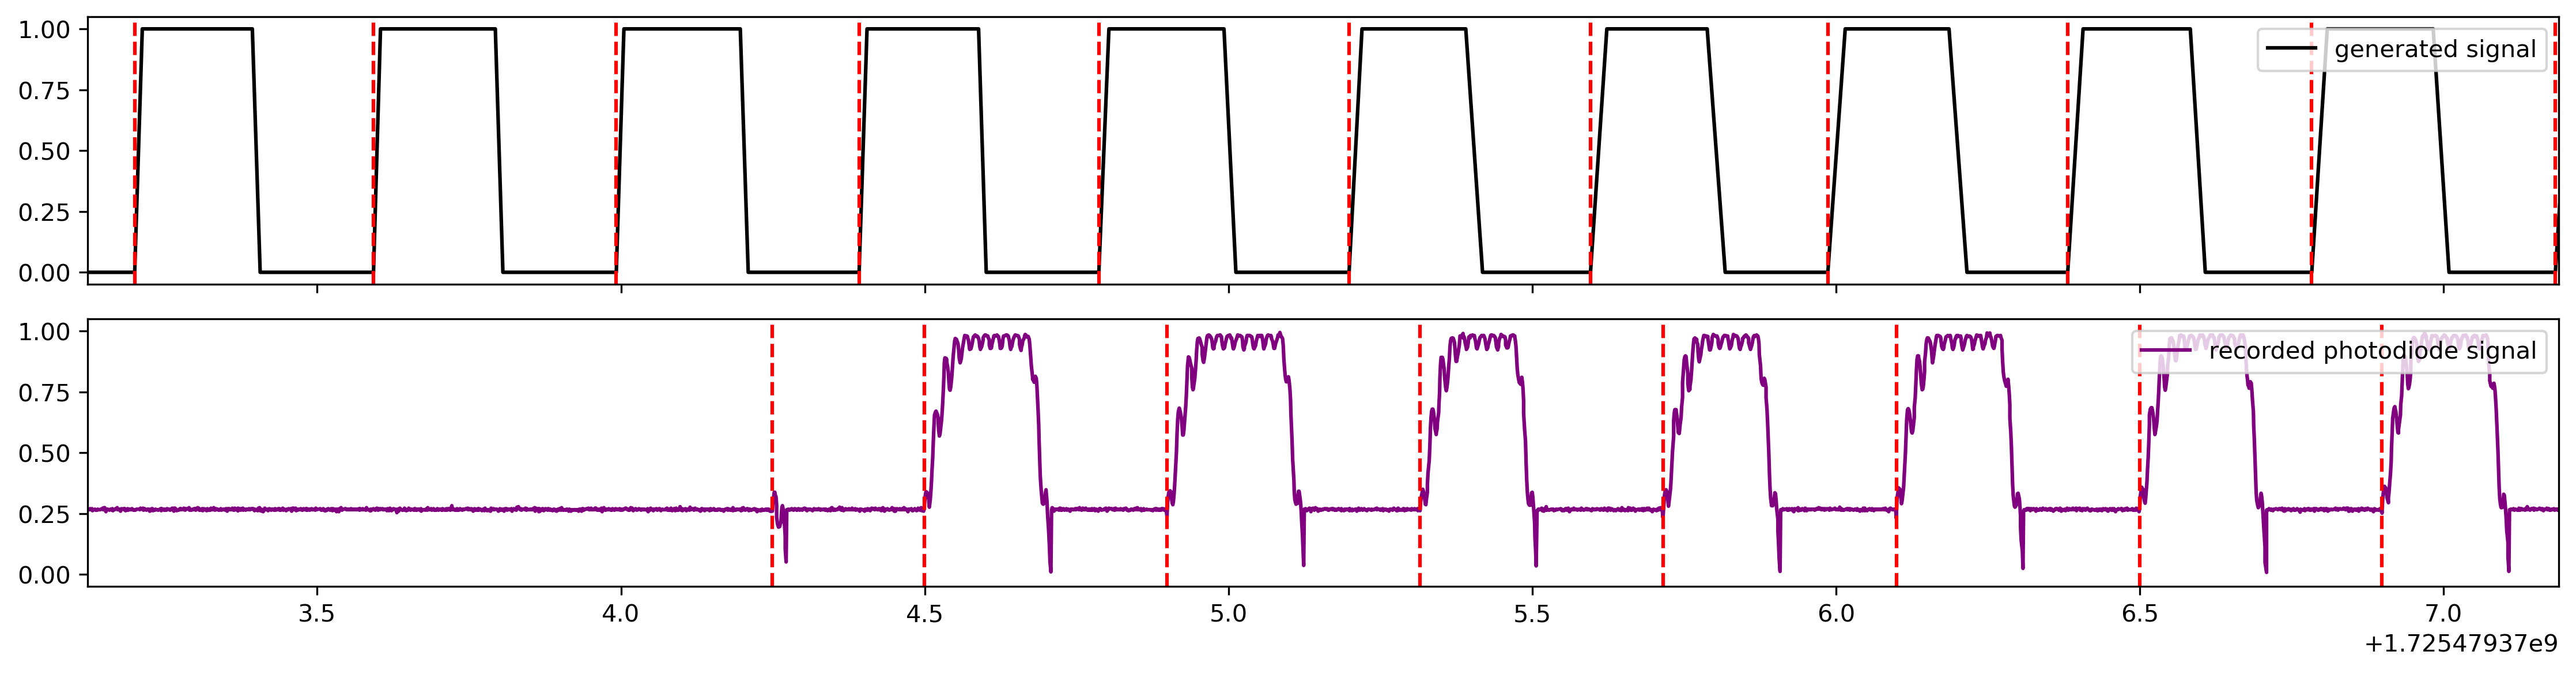

In [43]:
# Plot two datasets, sharing the same x-axis but different y-axes

fig, (ax3, ax1) = plt.subplots(2, 1, figsize=(15, 4), sharex=True, dpi=300)

# Create a second y-axis that shares the same x-axis
# ax2 = ax1.twinx()

# Plot the first dataset on the primary y-axis
# ax2.plot(read_t[1:], diff_read, 'g-', label='diff')

# Plot the second dataset on the secondary y-axis
ax1.plot(read_t, read_square, 'purple', label='recorded photodiode signal')

# draw line at the rising_read_t
for i in range(len(rising_read_t)):
    ax1.axvline(x=rising_read_t[i], color='r', linestyle='--')

# Add legends for both plots
ax1.legend(loc='upper right')
# ax2.legend(loc='upper left')

ax3.plot(generated_t, generated_square, 'k',label='generated signal')

# draw line at the generate_rising_t
for i in range(len(generate_rising_t)):
    ax3.axvline(x=generate_rising_t[i], color='r', linestyle='--')

ax3.legend(loc='upper right')

# Set the x-axis limits
# generage a random number between 0 and len(read_t) - 4000
random_start = np.random.randint(0, len(read_t) - 4000)
random_start = 64000
plt.xlim(read_t[random_start], read_t[random_start + 4000])
plt.tight_layout()
# Display the plot
plt.show()

get the time stamps of read signal's rising edge.

Text(0, 0.5, 'count')

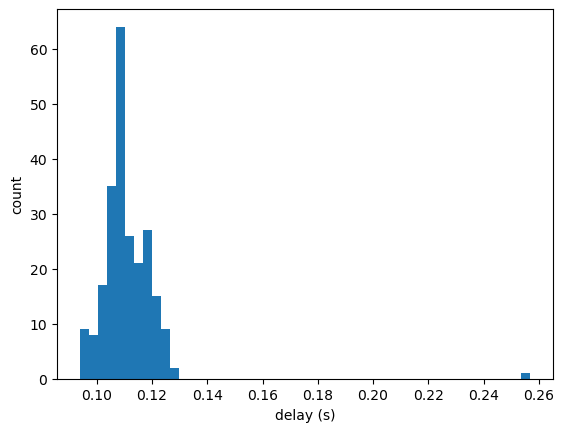

In [14]:
# find the largest generate_rising_ts that is smaller than read_rising_ts, for each element in read_rising_ts

ts_before_read = np.zeros(len(rising_read_t))
for i, ts in enumerate(rising_read_t):
    ts_before_read[i] = generate_rising_t[np.where(generate_rising_t <= ts)[0][-1]]

# calculate the difference between read_rising_ts and ts_before_read
diff = rising_read_t - ts_before_read

plt.hist(diff, bins=50)
plt.xlabel('delay (s)')
plt.ylabel('count')

(array([3.535e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.100e+01, 2.800e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 9.900e+01,
        8.000e+00, 4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

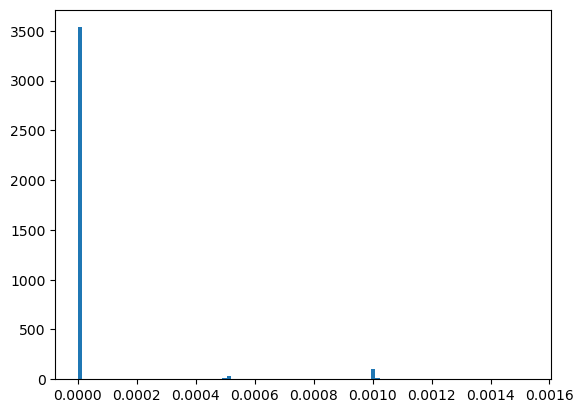

In [22]:
dlc_diff = task['dlc_time_stamp'] - task['dlc_read_time']
plt.hist(dlc_diff, bins=100)

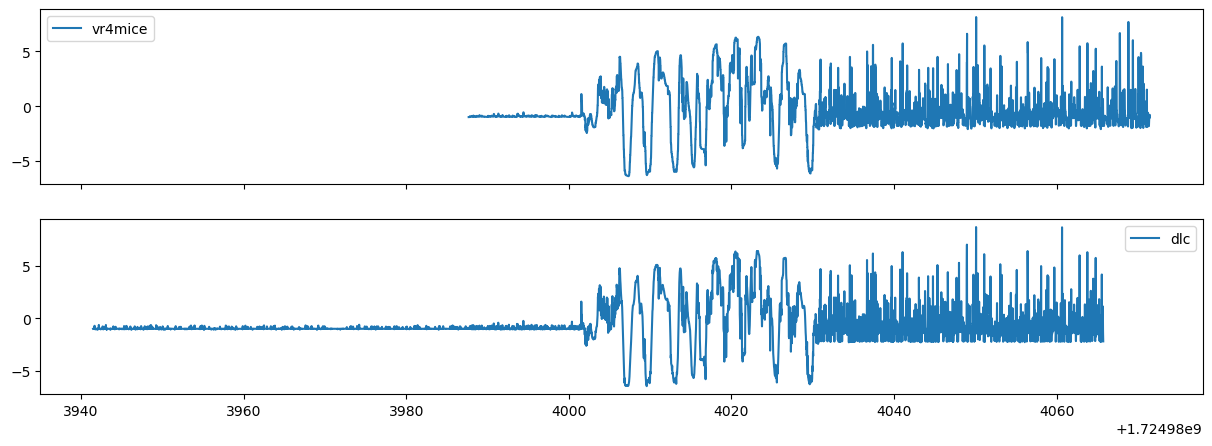

In [122]:
proc_x_interp = np.interp(data['x_pos'], [task['cropped_image'][0], task['cropped_image'][1]], [task['unity_arena_size'][0],task['unity_arena_size'][1]])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
ax1.plot(task['step_time']+task['start_time'], task['action'][:, 0, 0], label='vr4mice')
ax1.legend()
ax2.plot(data['time_stamp'], proc_x_interp, label='dlc')
ax2.legend()

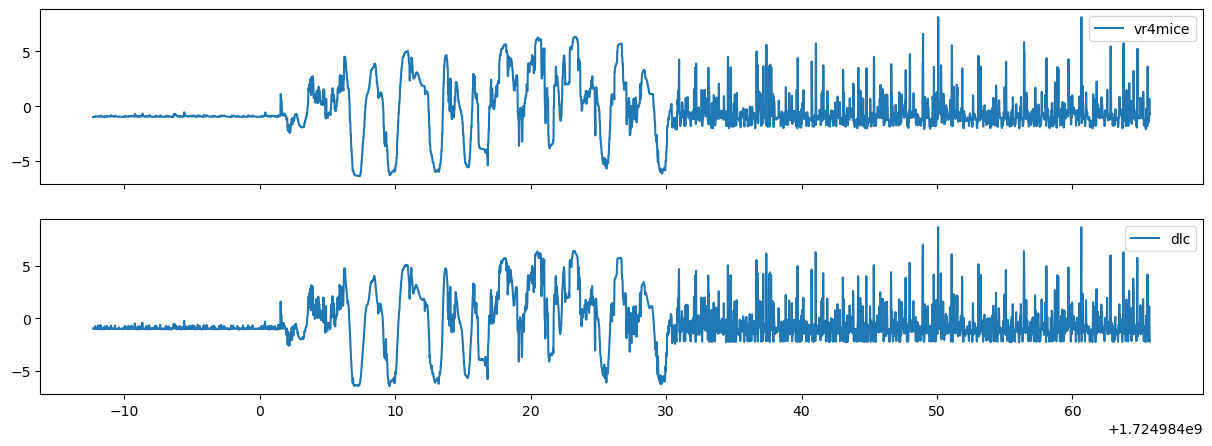

In [124]:
# get the overlapping time stamps of task['step_time'] and data['time_stamp']
task_time = task['step_time'] + task['start_time']
dlc_time = data['time_stamp']

min_time = max(task_time[0], dlc_time[0])
max_time = min(task_time[-1], dlc_time[-1])

task_index = np.where((task_time >= min_time) & (task_time <= max_time))[0]
dlc_index = np.where((dlc_time >= min_time) & (dlc_time <= max_time))[0]

task_time = task_time[task_index]
dlc_time = dlc_time[dlc_index]

task_action = task['action'][task_index, 0, 0]
dlc_x = proc_x_interp[dlc_index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
ax1.plot(task_time, task_action, label='vr4mice')
ax1.legend()
ax2.plot(dlc_time, dlc_x, label='dlc')
ax2.legend()

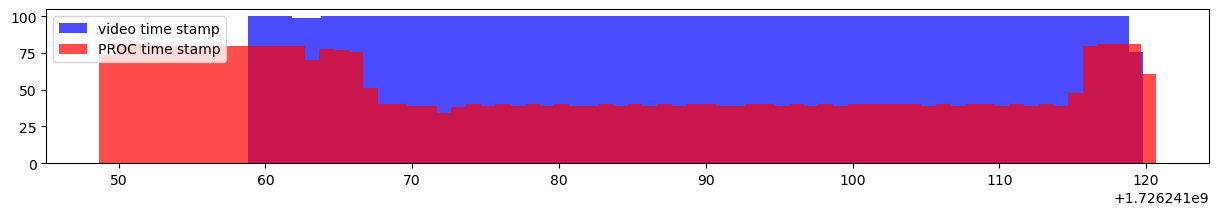

In [38]:
# plot the histogram of TS, and data['time_stamp'] in same figure, share x-axis and y-axis

w=1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 2))

ax.hist(TS, bins=np.arange(min(TS), max(TS) + w, w), color='b', alpha=0.7, label='video time stamp')
ax.hist(data['time_stamp'], bins=np.arange(min(data['time_stamp']), max(data['time_stamp']) + w, w), color='r', alpha=0.7, label='PROC time stamp')

# Add a legend
ax.legend()

plt.show()

dlclivegui send keypoint data to vr4mice before the video recording starts

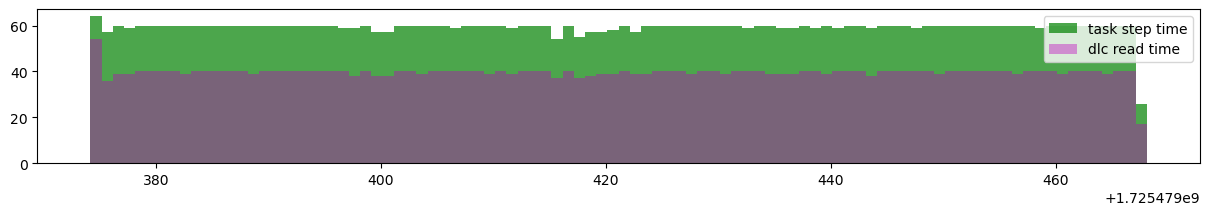

In [24]:
w=1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 2))
task_step = task['step_time'] + task['start_time']
ax.hist(task_step, bins=np.arange(min(task_step), max(task_step) + w, w), color='g', alpha=0.7, label='task step time')
ax.hist(task['dlc_read_time'], bins=np.arange(min(task['dlc_read_time']), max(task['dlc_read_time']) + w, w), color='m', alpha=0.4, label='dlc read time')

# Add a legend
ax.legend()

plt.show()

In [10]:
# count video frames
video_path = '/Volumes/xieluanlabs/xl_cl/setup_test/whole_test/Imaging_source_test_2024-08-29_1_VIDEO.avi'

import cv2

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_count

8363

In [18]:
import serial
import struct

In [30]:
import serial

# Define the serial port and the baud rate
port = 'COM5'
baud_rate = 9600  # Adjust the baud rate according to your device's configuration

# Open the serial port
ser = serial.Serial(port, baud_rate, timeout=1)

# Continuously read from the serial port
try:
    while True:
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()  # Read the line, decode it, and remove any extra spaces
            print(f"Received: {line}")  # Print the received data
except KeyboardInterrupt:
    print("Exiting...")
finally:
    ser.close()  # Close the serial port when done


Received: analog 14 is: 807
Received: analog 14 is: 397
Received: analog 14 is: 451
Received: analog 14 is: 456
Received: analog 14 is: 806
Received: analog 14 is: 614
Received: analog 14 is: 446
Received: analog 14 is: 448
Received: analog 14 is: 805
Received: analog 14 is: 612
Received: analog 14 is: 448
Received: analog 14 is: 448
Received: analog 14 is: 803
Received: analog 14 is: 612
Received: analog 14 is: 448
Received: analog 14 is: 448
Received: analog 14 is: 804
Received: analog 14 is: 610
Exiting...
